In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#Documents/recent personality/projects/personality-system/IPIP-FFM-data-8Nov2018/data-final.csv
df = pd.read_csv("C:\\Users\\KIIT\\Documents\\recent personality\\projects\\personality-system\\IPIP-FFM-data-8Nov2018\\data-final.csv",delimiter="\t")

In [4]:
df.shape #(rows, columns)

(1015341, 110)

In [36]:
df
data=df.copy()

pd.options.display.max_columns = 150 # Sets the maximum number of rows and columns in a dataframe
data.drop(data.columns[50:107], axis=1, inplace=True) # Dropping columns 
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants:', len(data)) # Total number of partcipants=Total no of rows
data.head()


Number of participants: 1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [37]:
data.shape

(1015341, 51)

In [20]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True) #Dropping those rows having missing values
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89227
Number of participants after eliminating missing values:  1013481


In [24]:
# Creating K-means Cluster Model 
# Formimg 5 clusters for the 5 personality groups
from sklearn.cluster import KMeans

# From the 51 colums, dropping the 'country' coulmn to form clusters only using personality type questions.  
df_model = data.drop('country', axis=1)

# Define 5 clusters and fit the model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [25]:
# Predicting the Clusters
pd.options.display.max_columns = 10 #Setting max colums to 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()
# Assigning the participants to a respective cluster 

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,1
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,2
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,2
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,1


In [26]:
df_model.Clusters.value_counts()
# How many participants are present under each cluster

3    226034
2    212371
1    210150
4    199891
0    165035
Name: Clusters, dtype: int64

In [27]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.185833,3.291575,2.794219,3.407447,2.584379,2.765789,2.117084,3.530112,2.644209,3.790511,2.341291,3.622953,2.990099,2.921980,2.321035,2.009428,2.297331,1.917884,2.575957,2.240858,3.022250,2.933087,2.567449,2.778908,3.146078,2.653074,2.998364,2.854031,2.607338,2.979871,3.145757,2.827758,3.668289,2.405799,2.372376,2.738474,3.378835,2.510316,2.773478,3.339885,3.532893,1.978132,3.612797,2.059139,3.620808,2.043839,3.884412,3.106462,3.697894,3.665041
1,3.475475,1.939938,4.340000,2.215556,4.266200,1.664468,3.889565,2.805282,3.746633,2.510954,2.323745,3.820452,3.155370,3.282289,2.116050,1.901665,2.112857,1.678606,2.118501,1.719220,1.894452,4.431754,1.833609,4.245815,1.857521,3.845891,1.588113,4.096702,4.098925,4.194347,3.714375,2.582189,4.190236,1.899581,3.137197,2.283012,3.868846,1.936888,3.579110,3.874019,3.884692,1.754709,4.082560,1.795360,4.158130,1.654713,4.313719,3.235142,4.094794,4.295556
2,2.130423,3.295827,3.097904,3.657091,2.967025,2.697779,2.213127,3.997999,2.331251,4.129274,3.509133,3.076173,4.157696,2.604706,2.823234,2.794087,2.874776,2.436015,2.977327,2.712046,1.880972,3.943217,1.691587,4.356584,1.981904,4.148090,2.009860,3.985930,4.179817,3.724661,3.837016,2.231091,4.301538,2.021203,3.239863,2.076140,4.166647,2.015972,3.834248,3.893959,3.580249,2.133596,3.900255,2.058666,3.732868,1.961482,4.013410,2.990648,4.269472,3.821106
3,3.447079,1.918557,3.787014,2.510636,4.036269,1.835481,3.647380,2.769995,3.762151,3.006499,3.810073,2.927909,4.242185,2.412610,3.287382,3.468204,3.808622,3.459555,3.658410,3.177690,2.163896,4.268553,2.661038,4.178818,2.005955,3.994479,1.862618,3.893220,4.126985,3.840975,2.950246,3.612187,3.837617,3.244114,2.228607,3.531809,3.453635,2.834060,2.939195,3.475274,3.737849,2.118933,4.247503,1.967394,3.955489,1.772897,3.960183,3.375227,4.188043,4.199988
4,1.806435,3.631894,2.229290,4.056241,2.279517,3.198743,1.740449,4.069893,2.173710,4.475674,4.247805,2.460631,4.501884,2.147025,3.557124,3.856417,3.986988,3.757323,4.005003,3.929802,2.502609,3.327393,2.604615,3.801157,2.589246,3.820297,2.746267,3.405401,3.642000,3.043359,2.806490,3.352692,3.811777,3.473913,2.094306,3.497181,3.561231,3.044004,2.778279,3.307668,3.498167,2.384540,4.059272,2.140336,3.430865,2.090259,3.676604,3.175561,4.274365,3.719012


In [28]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.911116,2.523882,2.854045,2.916097,3.120142
1,3.085407,2.422876,3.208713,3.106545,3.326937
2,3.051770,2.996519,3.190262,3.161768,3.246175
3,3.072106,3.425264,3.299654,3.210675,3.352351
4,2.966185,3.645000,3.148234,3.172754,3.244898


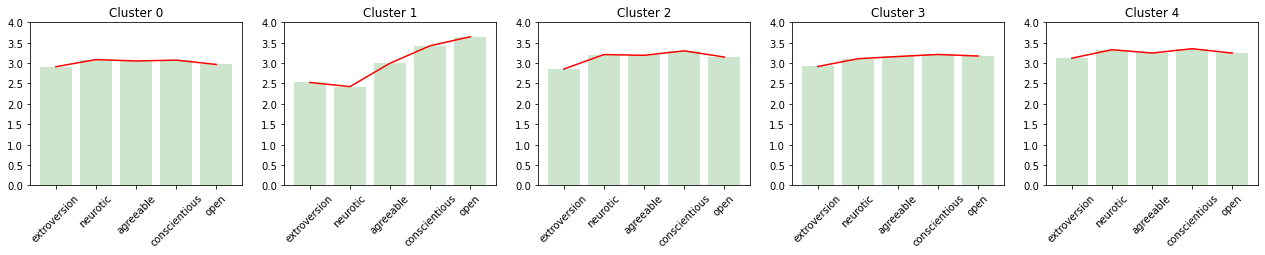

In [29]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

In [30]:
#Documents/recent personality/projects/answers.xlsx
my_data = pd.read_excel("C:\\Users\\KIIT\\Documents\\recent personality\\projects\\answers.xlsx")
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2,5,1,3,5,5,5,1,4,1,4,1,5,2,5,5,3,2,4,2,5,1,5,2,5,5


In [31]:
my_personality = k_fit.predict(my_data)
print('My Personality Cluster: ', my_personality)


My Personality Cluster:  [2]


In [39]:
# Summing up the the question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of the question groups')
my_sums

Sum of the question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.2,2.4,3.4,3.3,3.4,2


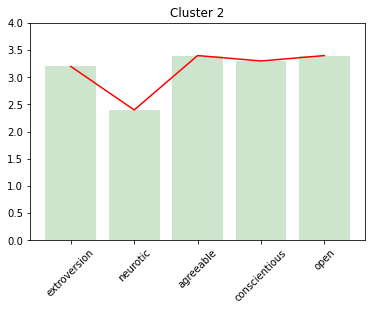

In [33]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title('Cluster 2')
plt.xticks(rotation=45)
plt.ylim(0,4);